<a href="https://colab.research.google.com/github/sergeyrmain/mnist_pytorch/blob/main/mnist_tuturial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch scikit-learn==0.20.* skorch

     |████████████████████████████████| 5.4 MB 18.0 MB/s 
     |████████████████████████████████| 128 kB 62.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier

In [ ]:

mnist=fetch_openml("mnist_784",cache=False)

In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.data.shape


(70000, 784)

In [ ]:
sqaredata=mnist.data.reshape(70000,28,28)


In [ ]:
28*28


784

In [ ]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X=mnist.data.astype('float32')
Y=mnist.target.astype('int64')

#preprocessing

In [ ]:
X=X/255.0

In [ ]:
X.min(),X.max()

(0.0, 1.0)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [ ]:
X_train.shape,Y_train.shape

((56000, 784), (56000,))

In [ ]:
700000*0.8

560000.0

#Building nural network with **pytorch**

In [ ]:
data_X=X.reshape(-1,1,28,28)
data_X.shape

(70000, 1, 28, 28)

In [ ]:
data_X_train,data_X_test,data_Y_train,data_Y_test=train_test_split(data_X,Y,test_size=0.2,random_state=20)
data_X_train.shape,data_Y_train.shape

((56000, 1, 28, 28), (56000,))

#building the actual network

In [ ]:
class My_network(nn.Module):
  def __init__(self,dropout=0.5):
    super(My_network,self).__init__()
    self.conv1=nn.Conv2d(1,32,kernel_size=3)
    self.conv2=nn.Conv2d(32,64,kernel_size=3)
    self.conv2_drop=nn.Dropout2d(dropout)
    self.fc1=nn.Linear(1600,100)
    self.fc2=nn.Linear(100,10)
    self.fc1_drop=nn.Dropout(dropout)
  

  def forward(self,X):
    X=torch.relu(F.max_pool2d(self.conv1(X),2))
    X=torch.relu(F.max_pool2d(self.conv2_drop(self.conv2(X)),2))

    X=X.view(-1,X.size(1)*X.size(2)*X.size(3))
    X=torch.relu(self.fc1_drop(self.fc1(X)))
    X=torch.softmax(self.fc2(X),dim=-1)
    return X

In [ ]:
784*64


50176

In [ ]:
torch.manual_seed(0)
device='cuda'
net = NeuralNetClassifier(
    My_network,
    max_epochs=10,
    lr=0.1,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
#my_cnn=NeuralNetClassifier(My_network,20,0.1,device)


In [ ]:
net.fit(data_X_train,data_Y_train)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


  epoch    train_loss    valid_acc    valid_loss      dur
-------  ------------  -----------  ------------  -------
      1        0.7579       0.9486        0.1721  35.0006
      2        0.2347       0.9650        0.1120  34.3924
      3        0.1757       0.9747        0.0815  34.4365
      4        0.1494       0.9776        0.0708  34.3491
      5        0.1306       0.9800        0.0638  34.4026
      6        0.1165       0.9812        0.0582  34.3990
      7        0.1097       0.9846        0.0497  34.5410
      8        0.0985       0.9862        0.0462  34.4872
      9        0.0967       0.9863        0.0443  34.5738
     10        0.0909       0.9860        0.0444  34.4532


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=My_network(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv2_drop): Dropout2d(p=0.5, inplace=False)
    (fc1): Linear(in_features=1600, out_features=100, bias=True)
    (fc2): Linear(in_features=100, out_features=10, bias=True)
    (fc1_drop): Dropout(p=0.5, inplace=False)
  ),
)

In [ ]:
#prediction_cnn=net.predict(data_X_test,data_Y_test)
from sklearn.metrics import accuracy_score

In [ ]:
Y_pred=net.predict(data_X_test)

In [ ]:
print(Y_pred)

[1 8 3 ... 1 8 1]


In [ ]:
accuracy_score(data_Y_test,Y_pred)

0.9846428571428572

In [ ]:
error_vec=Y_pred!=data_Y_test

In [ ]:
print(error_vec)

[False False False ... False False False]


In [ ]:
def plot_example(X,Y):
  for idx,(img,y) in enumerate(zip(X[:5].reshape(5,28,28),Y[:5])):
    plt.subplot(151+idx)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(y)

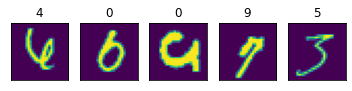

In [ ]:
plot_example(data_X_test[error_vec],Y_pred[error_vec])